In [19]:
# Adding a sparsity constraint on the encoded representations
# L1正規化を追加した場合
from keras.layers import Input, Dense
from keras.models import Model

from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [20]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [21]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [22]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [23]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [24]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [26]:
autoencoder.fit(x_train, x_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
autoencoder.save("./autoencoder_l1.h5")

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 3s 42us/step - loss: 0.6736 - val_loss: 0.6485
Epoch 2/200
60000/60000 [==============================] - 2s 42us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/200
60000/60000 [==============================] - 2s 41us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/200
60000/60000 [==============================] - 3s 42us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/200
60000/60000 [==============================] - 2s 39us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/200
60000/60000 [==============================] - 2s 39us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/200
60000/60000 [==============================] - 2s 39us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/200
60000/60000 [==============================] - 2s 40us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/200
60000/60000 [==============================] - 2s 40us/step - loss: 0.4531 - val_loss: 0.4

In [27]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

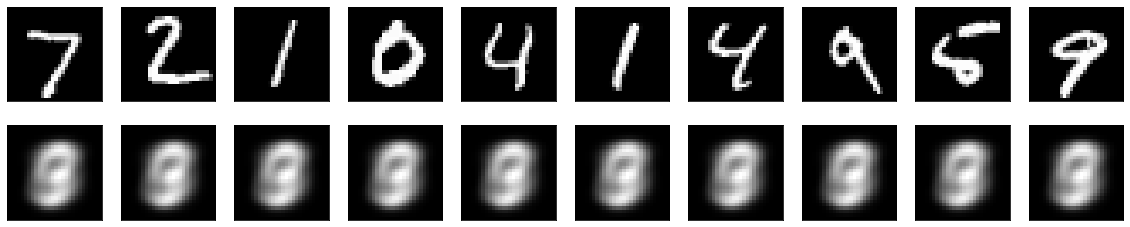

In [28]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()